# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Rio Octaviannus Loka
- **Email:** rioloka86@gmail.com
- **ID Dicoding:** rio_octaviannus_loka

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi cuaca (weathersit) memengaruhi rata-rata jumlah penyewaan sepeda?
- Pada hari apa dalam seminggu terjadi rata-rata permintaan penyewaan sepeda tertinggi dan terendah?
- Bagaimana pengaruh musim (season) terhadap rata-rata jumlah penyewaan sepeda Casual dan Registered?
- Bagaimana perbedaan rata-rata penyewaan sepeda antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Memuat Tabel Day

In [2]:
day_df = pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah file csv yaitu day menjadi dataframe supaya bisa diproses dengan library pandas

#### Memuat Tabel Hour

In [3]:
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengubah file csv yaitu hour menjadi dataframe supaya bisa diproses dengan library pandas. File hour memiliki jumlah row yang lebih banyak dan detail dibandingkan dengan tabel day

#### **Insight:**
- Tabel day menunjukkan ringkasan harian dari jumlah penyewaan sepeda
- Tabel hour menunjukkan detail dari penyewaan sepeda per jam. Hal ini memungkinkan analisis yang lebih mendetail terhadap pola waktu dari pelanggan

### Assessing Data

#### Menilai Data dari day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tidak ditemukan adanya missing value dari setiap kolom yang ada dalam day_df. Untuk tipe data dari tiap kolom, kolom dteday memiliki tipe data yang salah. Selain dari kolom dteday, kolom lain memiliki tipe data yang benar

In [5]:
print("Jumlah data duplikat: ", day_df.duplicated().sum())

Jumlah data duplikat:  0


Berdasarkan kode diatas, tidak ditemukan adanya data duplikat pada day_df

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Pada day_df, tidak ditemukan adanya keanehan pada value/nilai dari setiap kolom

#### Menilai Data dari hour_df

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tidak ditemukan adanya missing value dari setiap kolom yang ada dalam hour_df. Untuk tipe data dari tiap kolom, kolom dteday memiliki tipe data yang salah. Selain dari kolom dteday, kolom lain memiliki tipe data yang benar

In [8]:
print("Jumlah data duplikat: ", day_df.duplicated().sum())

Jumlah data duplikat:  0


Berdasarkan kode diatas, tidak ditemukan adanya data duplikat pada hour_df

In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Pada hour_df, tidak ditemukan adanya keanehan pada value/nilai dari setiap kolom

#### **Insight:**
- Data pada day_df dan hour_df tidak memiliki missing value (data telah lengkap)
- Kolom dteday pada day_df dan hour_df seharusnya bertipe data datetime, bukan object
- Tidak terdapat data duplikat pada day_df dan hour_df
- Tidak ditemukan data yang tidak akurat/relevan pada day_df dan hour_df

### Cleaning Data

Proses pembersihan data yang dilakukan ke dataframe day dan hour hanya akan mengubah tipe data dari satu kolom, yaitu dteday. Tipe data kolom ini akan diubah dari object menjadi datetime untuk mempermudah proses analisis

In [10]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Berdasarkan kode diatas, perubahan tipe data kolom dteday pada day_df dari object menjadi datetime telah berhasil dilakukan

In [11]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

 Berdasarkan kode diatas, perubahan tipe data kolom dteday pada hour_df dari object menjadi datetime telah berhasil dilakukan

**Insight:**
- Tipe data dteday pada day_df dan hour_df telah diubah menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore day_df

In [12]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Berdasarkan rangkuman parameter statistik diatas, kita bisa melihat bahwa rata rata pelanggan menyewa sepeda di musim panas dan musim gugur. Rata-rata para pelanggan juga menyewa sepedanya pada saat hari kerja serta dihari rabu. Mereka juga rata-rata menyewa saat cuaca dalam keadaan cerah ataupun berkabut dan berawan.

In [13]:
day_df['yr'] = day_df['yr'].replace({0: 2011, 1: 2012})
day_df['weekday'] = day_df['weekday'].replace({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})
day_df['season'] = day_df['season'].replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"})
day_df['weathersit'] = day_df['weathersit'].replace({1: "clear", 2: "mist & cloudy", 3: "light rain/light snow", 4: "heavy rain/snow"})
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,1,0,Saturday,0,mist & cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,1,0,Sunday,0,mist & cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,1,0,Monday,1,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,1,0,Tuesday,1,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,1,0,Wednesday,1,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,spring,2012,12,0,Thursday,1,mist & cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,spring,2012,12,0,Friday,1,mist & cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,spring,2012,12,0,Saturday,0,mist & cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,spring,2012,12,0,Sunday,0,clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Pada kode diatas, dilakukan pengubah value data kategorikal dari kolom yr, weekday, season, dan weathersit supaya nilai dari kolom tersebut bisa lebih bermakna dan mudah dipahami

In [14]:
day_df.groupby(by="weathersit").agg({
    "casual": ["sum", "max", "min"],
    "registered": ["sum", "max", "min"],
    "cnt": ["sum", "max", "min", "mean"]
})

casual           registered                 cnt        \
                          sum   max min        sum   max  min      sum   max   
weathersit                                                                     
clear                  446346  3410  15    1811606  6946  416  2257952  8714   
light rain/light snow    3895  1264   2      33974  4324   20    37869  4639   
mist & cloudy          169776  3155   9     827082  6844  491   996858  8362   

                                         
                       min         mean  
weathersit                               
clear                  431  4876.786177  
light rain/light snow   22  1803.285714  
mist & cloudy          605  4035.862348

Dari output kode diatas, bisa kita lihat bahwa rata-rata pelanggan menyewa disaat cuaca sedang cerah dibandingkan dengan cuaca lainnya. Hal ini dapat kita lihat dari perbandingan nilai mean pelangggan dari tiap cuaca

In [15]:
day_df.groupby(by="weekday").agg({
    "casual": ["sum", "max", "min"],
    "registered": ["sum", "max", "min"],
    "cnt": ["sum", "max", "min", "mean"]
})

casual           registered                 cnt              \
              sum   max min        sum   max   min     sum   max   min   
weekday                                                                  
Friday      78238  2469  38     409552  6917  1129  487790  8362  1167   
Monday      70784  3065   2     384719  6435    20  455503  7525    22   
Saturday   153852  3410  57     323955  5966   570  477807  8714   627   
Sunday     140521  3283  54     303506  5657   451  444027  8227   605   
Thursday    61460  1405  15     423935  6781   416  485395  7804   431   
Tuesday     57843  1348   9     411266  6697   573  469109  7767   683   
Wednesday   57319  2562   9     415729  6946   432  473048  8173   441   

                        
                  mean  
weekday                 
Friday     4690.288462  
Monday     4338.123810  
Saturday   4550.542857  
Sunday     4228.828571  
Thursday   4667.259615  
Tuesday    4510.663462  
Wednesday  4548.538462

Dari output kode diatas, bisa kita lihat bahwa kebanyakan pelanggan menyewa sepeda pada hari Jumat. Sedangkan pelanggan menyewa paling sedikit di hari Minggu.

In [16]:
day_df.groupby(by="season").agg({
    "casual": ["sum", "max", "min", "mean"],
    "registered": ["sum", "max", "min", "mean"]
})

casual                         registered                        
           sum   max  min         mean        sum   max  min         mean
season                                                                   
fall    226091  3160  118  1202.611702     835038  6917  889  4441.691489
spring   60622  3155    9   334.928177     410726  5315  416  2269.204420
summer  203522  3410  120  1106.097826     715067  6456  674  3886.233696
winter  129782  3031    2   729.112360     711831  6946   20  3999.050562

Dari output kode diatas, rata-rata pelanggan casual paling banyak menyewa sepeda pada musim gugur, disusul dengan musim panas, dingin, dan semi. Sedangkan untuk pelanggan teregistrasi, rata-rata paling banyak menyewa sepeda pada musim gugur, diikuti dengan musim dingin, panas, dan semi.

In [17]:
day_df.groupby(by="holiday").agg({
    "casual": ["sum", "max", "min"],
    "registered": ["sum", "max", "min"],
    "cnt": ["sum", "max", "min", "mean"]
})

casual            registered                 cnt              \
            sum   max  min        sum   max  min      sum   max   min   
holiday                                                                 
0        597658  3410    2    2616586  6946   20  3214244  8714    22   
1         22359  3065  117      56076  5172  573    78435  7403  1000   

                      
                mean  
holiday               
0        4527.104225  
1        3735.000000

Bisa dilihat bahwa kebanyakan pelanggan menyewa sepeda ketika sedang bukan hari libur.

### Explore hour_df

In [18]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Berdasarkan rangkuman parameter statistik diatas, kita bisa melihat bahwa rata rata pelanggan menyewa sepeda di musim panas dan musim gugur. Rata-rata para pelanggan juga menyewa sepedanya pada saat hari kerja serta dihari rabu. Mereka juga rata-rata menyewa saat cuaca dalam keadaan cerah ataupun berkabut dan berawan.

In [19]:
hour_df['yr'] = hour_df['yr'].replace({0: 2011, 1: 2012})
hour_df['weekday'] = hour_df['weekday'].replace({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})
hour_df['season'] = hour_df['season'].replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"})
hour_df['weathersit'] = hour_df['weathersit'].replace({1: "clear", 2: "mist & cloudy", 3: "light rain/light snow", 4: "heavy rain/snow"})
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,1,0,0,Saturday,0,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,spring,2011,1,1,0,Saturday,0,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,spring,2011,1,2,0,Saturday,0,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,spring,2011,1,3,0,Saturday,0,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,spring,2011,1,4,0,Saturday,0,clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,spring,2012,12,19,0,Monday,1,mist & cloudy,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,spring,2012,12,20,0,Monday,1,mist & cloudy,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,spring,2012,12,21,0,Monday,1,clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,spring,2012,12,22,0,Monday,1,clear,0.26,0.2727,0.56,0.1343,13,48,61


Pada kode diatas, dilakukan pengubah value data kategorikal dari kolom yr, weekday, season, dan weathersit supaya nilai dari kolom tersebut bisa lebih bermakna dan mudah dipahami.

In [20]:
hour_df.groupby(by="weathersit").agg({
    "casual": ["sum", "max", "min"],
    "registered": ["sum", "max", "min"],
    "cnt": ["sum", "max", "min", "mean"]
})

casual          registered               cnt           \
                          sum  max min        sum  max min      sum  max min   
weathersit                                                                     
clear                  462745  367   0    1875428  886   0  2338173  977   1   
heavy rain/snow             8    6   1        215  158  22      223  164  23   
light rain/light snow   22783  263   0     135548  791   0   158331  891   1   
mist & cloudy          134481  350   0     661471  822   0   795952  957   1   

                                   
                             mean  
weathersit                         
clear                  204.869272  
heavy rain/snow         74.333333  
light rain/light snow  111.579281  
mist & cloudy          175.165493

Dari output kode diatas, bisa kita lihat bahwa rata-rata pelanggan menyewa disaat cuaca sedang cerah dibandingkan dengan cuaca lainnya. Hal ini dapat kita lihat dari perbandingan nilai mean pelangggan dari tiap cuaca.

In [21]:
hour_df.groupby(by="weekday").agg({
    "casual": ["sum", "max", "min"],
    "registered": ["sum", "max", "min"],
    "cnt": ["sum", "max", "min", "mean"]
})

casual          registered              cnt                     
              sum  max min        sum  max min     sum  max min        mean
weekday                                                                    
Friday      78238  264   0     409552  757   0  487790  957   1  196.135907
Monday      70784  272   0     384719  857   0  455503  968   1  183.744655
Saturday   153852  367   0     323955  491   0  477807  783   1  190.209793
Sunday     140521  317   0     303506  526   0  444027  776   1  177.468825
Thursday    61460  154   0     423935  885   0  485395  976   1  196.436665
Tuesday     57843  178   0     411266  871   0  469109  970   1  191.238891
Wednesday   57319  237   0     415729  886   0  473048  977   1  191.130505

Dari output kode diatas, bisa kita lihat bahwa kebanyakan pelanggan menyewa sepeda pada hari Jumat. Sedangkan pelanggan menyewa paling sedikit di hari Minggu.


In [22]:
hour_df.groupby(by="season").agg({
    "casual": ["sum", "max", "min", "mean"],
    "registered": ["sum", "max", "min", "mean"]
})

casual                     registered                     
           sum  max min       mean        sum  max min        mean
season                                                            
fall    226091  350   0  50.287144     835038  886   0  185.729093
spring   60622  367   0  14.290901     410726  681   0   96.823668
summer  203522  361   0  46.160581     715067  782   0  162.183488
winter  129782  362   0  30.666824     711831  876   0  168.202032

Dari output kode diatas, rata-rata pelanggan casual paling banyak menyewa sepeda pada musim gugur, disusul dengan musim panas, dingin, dan semi. Sedangkan untuk pelanggan teregistrasi, rata-rata paling banyak menyewa sepeda pada musim gugur, diikuti dengan musim dingin, panas, dan semi.

In [23]:
hour_df.groupby(by="holiday").agg({
    "casual": ["sum", "max", "min"],
    "registered": ["sum", "max", "min"],
    "cnt": ["sum", "max", "min", "mean"]
})

casual          registered               cnt                    
            sum  max min        sum  max min      sum  max min       mean
holiday                                                                  
0        597658  367   0    2616586  886   0  3214244  977   1  190.42858
1         22359  272   0      56076  601   0    78435  712   1  156.87000

Bisa dilihat bahwa kebanyakan pelanggan menyewa sepeda ketika sedang bukan hari libur.

### **Insight:**
- Kebanyakan pelanggan rata-rata menyewa sepeda pada saat cuaca cerah
- Pelanggan paling banyak menyewa sepeda pada hari Jumat. Sedangkan untuk rata-rata jumlah penyewaan sepeda paling sedikit terdapat pada hari Minggu
- Rata-rata pelanggan casual paling banyak menyewa sepeda pada musim gugur, disusul dengan musim panas, dingin, dan semi. Sedangkan pelanggan teregistrasi paling banyak menyewa sepeda pada musim gugur, disusul dengan musim dingin, panas, dan semi
- Pelanggan paling banyak menyewa sepeda ketika bukan hari libur

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kondisi cuaca (weathersit) memengaruhi rata-rata jumlah penyewaan sepeda?

In [24]:
weather_situation_df = day_df.groupby(by="weathersit").cnt.mean().reset_index()
weather_situation_df.rename(columns={
    "weathersit": "weather_situation"
}, inplace=True)
weather_situation_df

,weather_situation,cnt
0,clear,4876.786177
1,light rain/light snow,1803.285714
2,mist & cloudy,4035.862348


weather_situation_df merupakan dataframe yang berisi jumlah rata-rata pelanggan berdasarkan kondisi cuaca. Nama kolom diubah dari weathersit menjadi weather_situation untuk memperjelas maksud dari kolom.

Dari output kode diatas, kita bisa melihat urutan kondisi cuaca yang diminati oleh pelanggan, yaitu cerah, berkabut dan berawan, serta hujan ringan/sedikit bersalju

<ipython-input-25-a29ea736016c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


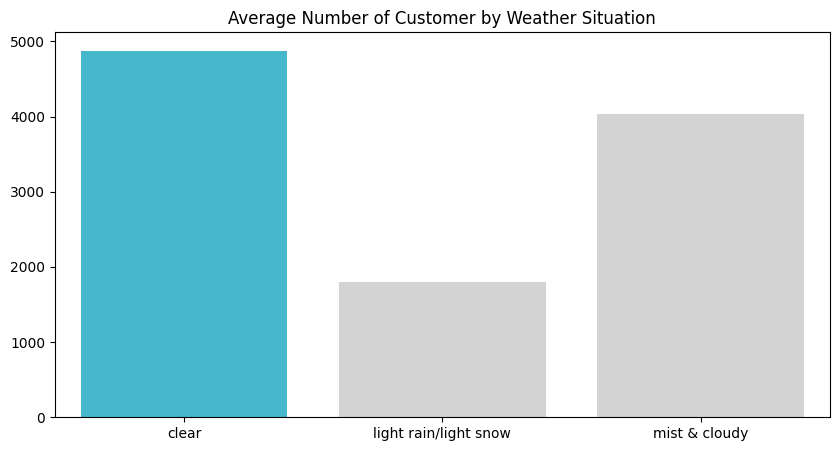

In [25]:
plt.figure(figsize=(10, 5))

colors = ["#31C7E1", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="weather_situation",
    y="cnt",
    data=weather_situation_df,
    palette=colors
)
plt.title("Average Number of Customer by Weather Situation")
plt.ylabel(None)
plt.xlabel(None)
plt.show()

Berdasarkan visualisasi data dengan bar chart diatas, bisa dilihat bahwa pengaruh antara kondisi cuaca dengan jumlah pelanggan. Para pelanggan lebih suka menyewa sepeda pada kondisi cuaca cerah, yang diikuti dengan keadaan berkabut dan berawan, dan terakhir menyewa sepeda pada kondisi cuaca hujan ringan/ sedikit bersalju kurang diminati oleh para pelanggan

### Pertanyaan 2: Pada hari apa dalam seminggu terjadi rata-rata permintaan penyewaan sepeda tertinggi dan terendah?

In [26]:
weekday_df = day_df.groupby(by="weekday").cnt.mean().sort_values(ascending=False).reset_index()
weekday_df

,weekday,cnt
0,Friday,4690.288462
1,Thursday,4667.259615
2,Saturday,4550.542857
3,Wednesday,4548.538462
4,Tuesday,4510.663462
5,Monday,4338.123810
6,Sunday,4228.828571


weekday_df merupakan dataframe yang berisi jumlah rata-rata pelanggan berdasarkan hari-hari dalam seminggu. Dari output kode diatas, kita bisa melihat bahwa rata-rata permintaan penyewaan sepeda tertinggi terdapat pada hari Jumat. Sedangkan untuk rata-rata permintaan penyewaan sepeda terendah terdapat pada hari Minggu.

<ipython-input-27-7e3921b16551>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


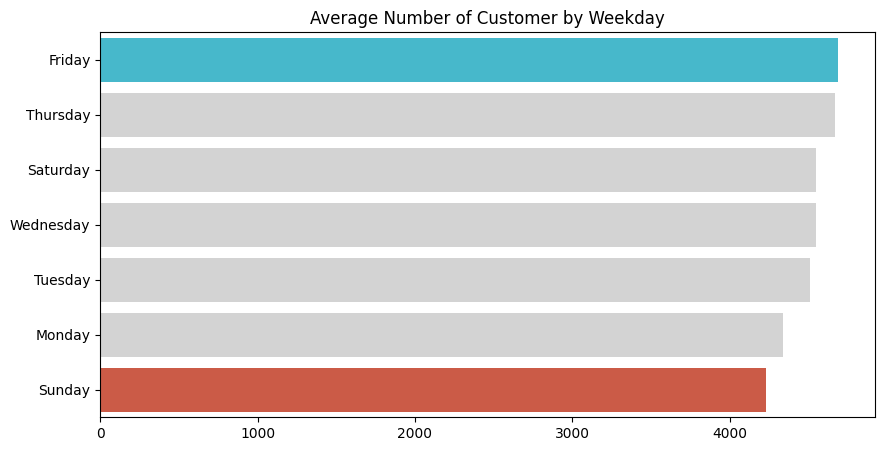

In [27]:
plt.figure(figsize=(10,5))

colors = ["#31C7E1", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#E14B31"]

sns.barplot(
    x="cnt",
    y="weekday",
    data=weekday_df,
    palette=colors
)
plt.title("Average Number of Customer by Weekday")
plt.ylabel(None)
plt.xlabel(None)
plt.show()

Berdasarkan visualisasi data dengan bar chart diatas, bisa dilihat bahwa rata-rata permintaan penyewaan sepeda tertinggi terdapat pada hari Jumat, yang ditandai dengan warna biru. Sedangkan untuk permintaan penyewaan sepeda terendah terdapat pada hari Minggu, yang ditandai dengan warna merah.

### Pertanyaan 3: Bagaimana pengaruh musim (season) terhadap rata-rata jumlah penyewaan sepeda Casual dan Registered?

In [28]:
season_day_df = day_df.groupby(by="season").agg({
    "casual": "mean",
    "registered": "mean"
})
season_day_df

,casual,registered
season,,
fall,1202.611702,4441.691489
spring,334.928177,2269.204420
summer,1106.097826,3886.233696
winter,729.112360,3999.050562


season_df merupakan dataframe yang berisi jumlah rata-rata pelanggan berdasarkan musim. Dari output kode diatas, kita bisa melihat bahwa rata-rata pelanggan casual paling banyak menyewa sepeda pada musim gugur, disusul dengan musim panas, dingin, dan semi. Sedangkan untuk pelanggan teregistrasi, rata-rata paling banyak menyewa sepeda pada musim gugur, diikuti dengan musim dingin, panas, dan semi.

<ipython-input-29-58c543c4a6a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y ="casual", data=season_day_df, palette=colors, ax=ax[0])
<ipython-input-29-58c543c4a6a0>:3: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.barplot(x="season", y ="casual", data=season_day_df, palette=colors, ax=ax[0])
<ipython-input-29-58c543c4a6a0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="registered", data=season_day_df, palette=colors, ax=ax[1])
<ipython-input-29-58c543c4a6a0>:9: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.barplot(x="season", y="registered", data=s

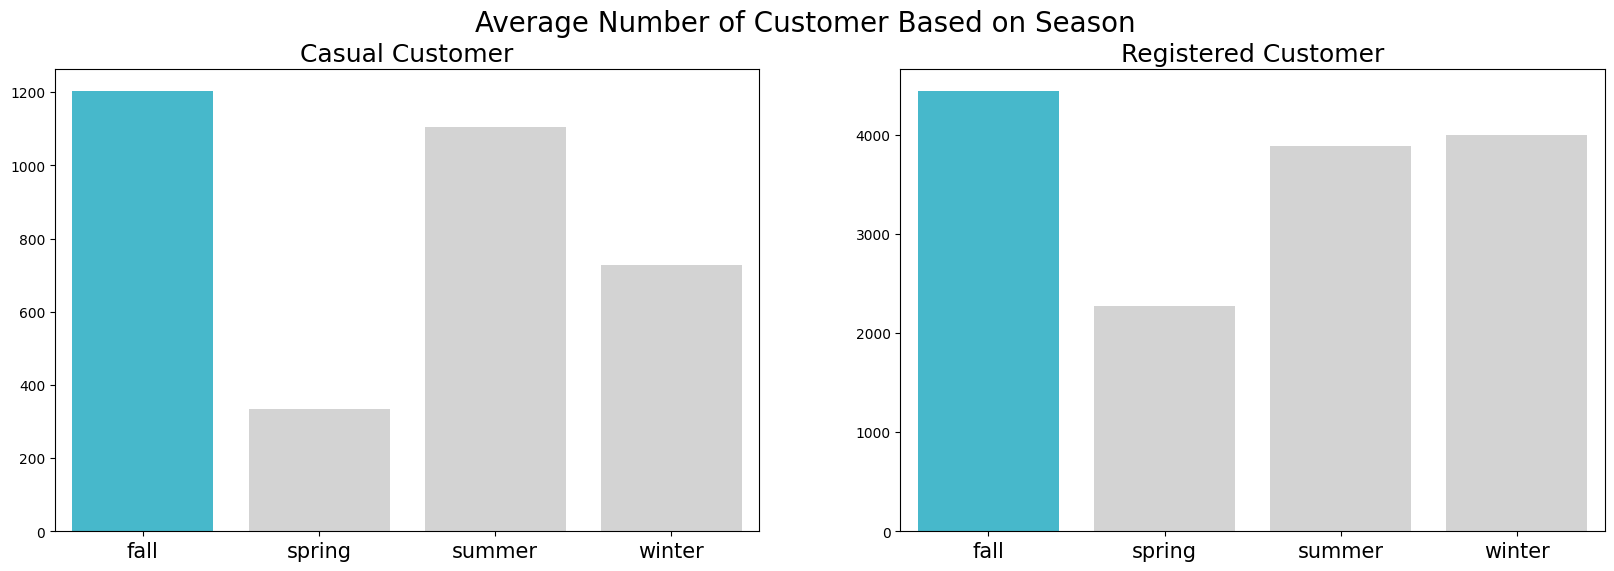

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

sns.barplot(x="season", y ="casual", data=season_day_df, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Casual Customer", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(x="season", y="registered", data=season_day_df, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Registered Customer", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

plt.suptitle("Average Number of Customer Based on Season", fontsize=20)
plt.show()

Berdasarkan visualisasi data dengan bar chart diatas, bisa dilihat bahwa pengaruh antara musim dengan rata-rata jumlah pelanggan casual dan teregistrasi. Rata-rata pelanggan casual paling banyak menyewa sepeda pada musim gugur, disusul dengan musim panas, dingin, dan semi. Sedangkan untuk pelanggan teregistrasi, rata-rata paling banyak menyewa sepeda pada musim gugur, diikuti dengan musim dingin, panas, dan semi.

### Pertanyaan 4: Bagaimana perbedaan rata-rata penyewaan sepeda antara hari kerja dan hari libur?

In [30]:
holiday_df = day_df.groupby("holiday").cnt.mean().reset_index()
holiday_df["holiday"] = holiday_df["holiday"].replace({0: "Not Holiday", 1: "Holiday"})
holiday_df

,holiday,cnt
0,Not Holiday,4527.104225
1,Holiday,3735.000000


holiday_df merupakan dataframe yang berisi jumlah rata-rata pelanggan berdasarkan hari libur atau tidak. Dari output kode diatas, kita bisa melihat bahwa rata-rata penyewaan sepeda dihari bukan libur lebih tinggi dibanding hari libur

<ipython-input-31-ca2df5e654bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-31-ca2df5e654bd>:3: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.barplot(


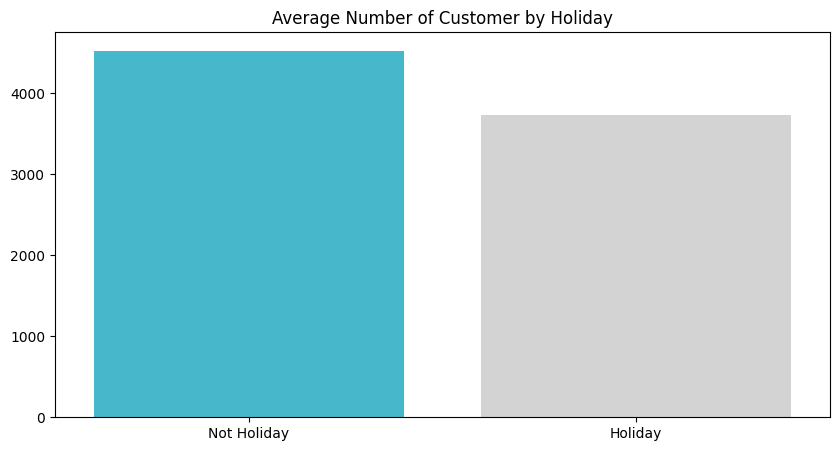

In [31]:
plt.figure(figsize=(10,5))

sns.barplot(
    x="holiday",
    y="cnt",
    data=holiday_df,
    palette=colors
)

plt.title("Average Number of Customer by Holiday")
plt.ylabel(None)
plt.xlabel(None)
plt.show()

Berdasarkan visualisasi data dengan bar chart diatas, bisa dilihat bahwa rata-rata penyewaan sepeda dihari bukan libur lebih tinggi dibanding hari libur

### **Insight:**
- Para pelanggan lebih suka menyewa sepeda pada kondisi cuaca cerah, yang diikuti dengan keadaan berkabut dan berawan, dan terakhir menyewa sepeda pada kondisi cuaca hujan ringan/ sedikit bersalju kurang diminati oleh para pelanggan
- Rata-rata permintaan penyewaan sepeda tertinggi terdapat pada hari Jumat. Sedangkan untuk rata-rata permintaan penyewaan sepeda terendah terdapat pada hari Minggu.
- Rata-rata pelanggan casual paling banyak menyewa sepeda pada musim gugur, disusul dengan musim panas, dingin, dan semi. Sedangkan untuk pelanggan teregistrasi, rata-rata paling banyak menyewa sepeda pada musim gugur, diikuti dengan musim dingin, panas, dan semi.
- Rata-rata penyewaan sepeda dihari bukan libur lebih tinggi dibanding hari libur

## Analisis Lanjutan: Clustering (Metode Binning)

In [32]:
clustering_df = day_df[["instant","temp"]]
clustering_df.rename(columns={"temp": "temperature"}, inplace=True)

clustering_df

<ipython-input-32-35e2c486fee3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df.rename(columns={"temp": "temperature"}, inplace=True)


,instant,temperature
0,1,0.344167
1,2,0.363478
2,3,0.196364
3,4,0.200000
4,5,0.226957
...,...,...
726,727,0.254167
727,728,0.253333
728,729,0.253333
729,730,0.255833


clustering_df merupakan dataframe yang berisi record index dan suhu yang nilainya telah dinormalisasikan. Proses normalisasi tersebut dilakukan dengan membagi semua nilai record dengan 41. Selanjutnya, dilakukan perubahan nama kolom clustering_df dari temp menjadi temperature

In [33]:
# Menentukan batas bin berdasarkan distribusi "temperature"
bins = [0, 13/41, 24/41, clustering_df["temperature"].max()]  # Rentang nilai untuk masing-masing kategori
labels = ["Low Temp", "Medium Temp", "High Temp"]

# Membuat kolom baru berdasarkan binning
clustering_df["temperature_category"] = pd.cut(clustering_df["temperature"], bins=bins, labels=labels, include_lowest=True)

# Menampilkan jumlah data di setiap kategori
print(clustering_df)
clustering_df["temperature_category"].value_counts()

     instant  temperature temperature_category
0          1     0.344167          Medium Temp
1          2     0.363478          Medium Temp
2          3     0.196364             Low Temp
3          4     0.200000             Low Temp
4          5     0.226957             Low Temp
..       ...          ...                  ...
726      727     0.254167             Low Temp
727      728     0.253333             Low Temp
728      729     0.253333             Low Temp
729      730     0.255833             Low Temp
730      731     0.215833             Low Temp

[731 rows x 3 columns]


<ipython-input-33-f8aceadfc1d2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df["temperature_category"] = pd.cut(clustering_df["temperature"], bins=bins, labels=labels, include_lowest=True)


,count
temperature_category,
Medium Temp,312
High Temp,269
Low Temp,150


Disini dilakukan pembagian rentang untuk proses binning nantinya. Pembagiannya sebagai berikut:
- Rentang pertama yaitu dari 0 hingga 13/41 dengan label Low Temp
- Rentang kedua yaitu dari 13/41 hingga 24/41 dengan label Medium Temp
- Rentang ketiga yaitu dari 24/41 hingga nilai maksimal dari kolom temperature dengan label High Temp

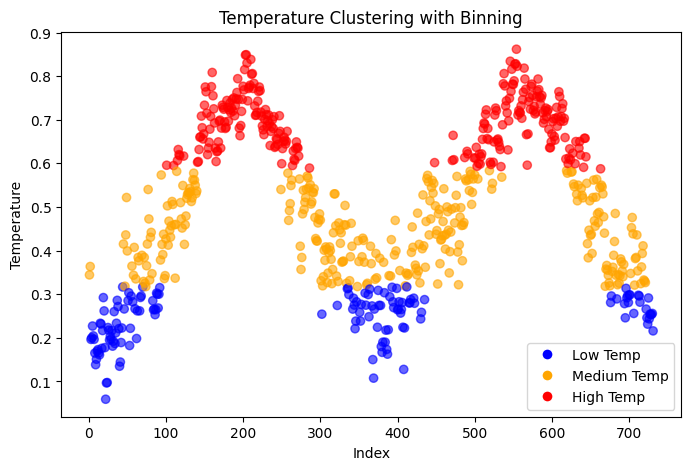

In [34]:
# Visualisasi dengan scatter plot
plt.figure(figsize=(8, 5))
colors = {'Low Temp': 'blue', 'Medium Temp': 'orange', 'High Temp': 'red'}
plt.scatter(x=clustering_df["instant"], y=clustering_df["temperature"],
            c=clustering_df["temperature_category"].map(colors), alpha=0.6)

# Menambahkan label
plt.xlabel("Index")
plt.ylabel("Temperature")
plt.title("Temperature Clustering with Binning")
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[label], markersize=8, label=label) for label in labels])
plt.show()

Grafik scatter plot diatas menggambarkan hasil clustering dengan metode binning yang dibagi menjadi 3 label, yaitu low temp, medium temp, dan high temp

## Conclusion

- Conclusion pertanyaan 1: Kondisi cuaca memiliki pengaruh yang besar terhadap rata-rata jumlah penyewaan sepeda. Kondisi cuaca dengan rata-rata jumlah penyewaan sepeda terbanyak terdapat pada kondisi cuaca cerah. Kemudian disusul dengan kondisi cuaca berkabut dan berawan. Kondisi cuaca dengan rata-rata jumlah penyewaan sepeda paling sedikit terdapat pada kondisi cuaca hujan ringan/ sedikit bersalju
- Conclusion pertanyaan 2: Berdasarkan grafik visualisasi data, bisa dilihat bahwa rata-rata permintaan penyewaan sepeda tertinggi terdapat pada hari Jumat, sedangkan untuk rata-rata permintaan penyewaan sepeda terendah terdapat pada hari Minggu. Perbedaan keduanya tidaklah terlalu besar karena masih dibawah 1000
- Conclusion pertanyaan 3: Musim memiliki pengaruh yang signifikan terhadap rata-rata jumlah penyewaan sepeda, baik untuk pelanggan kasual maupun pelanggan teregistrasi. Untuk rata-rata pelanggan kasual, mereka paling banyak menyewa pada musim gugur, dilanjutkan dengan musim panas, musim dingin, dan terakhir musim semi. Sedangkan untuk rata-rata pelanggan teregistrasi, mereka paling banyak menyewa pada musim gugur, dilanjutkan dengan musim dingin, musim panas, dan terakhir musim semi
- Conclusion pertanyaan 4: Rata-rata penyewaan pada hari libur dan bukan hari libur memiliki perbedaan yang cukup tampak. Rata-rata pelanggan lebih suka menyewa sepeda pada hari bukan libur dibandingkan dengan hari libur.

In [35]:
day_df.to_csv("cleaned_day.csv", index=False)